In [46]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [47]:
# Download data for Apple (AAPL) from 2020-01-01 to 2024-07-04
df = yf.download("AAPL", start="2020-01-01", end="2024-07-04")
df = df.reset_index()
df = df.drop(['Date','Adj Close'],axis = 1)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
0,74.059998,75.150002,73.797501,75.087502,135480400
1,74.287498,75.144997,74.125000,74.357498,146322800
2,73.447502,74.989998,73.187500,74.949997,118387200
3,74.959999,75.224998,74.370003,74.597504,108872000
4,74.290001,76.110001,74.290001,75.797501,132079200


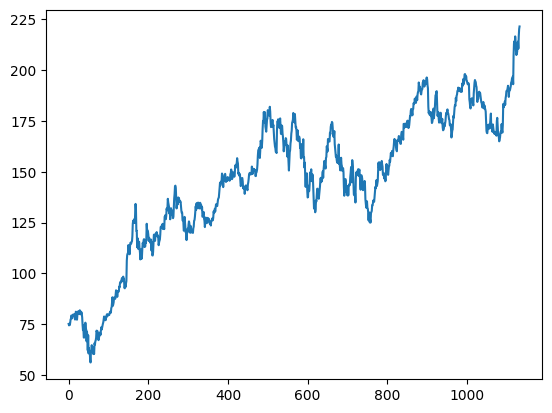

In [48]:
plt.plot(df.Close)

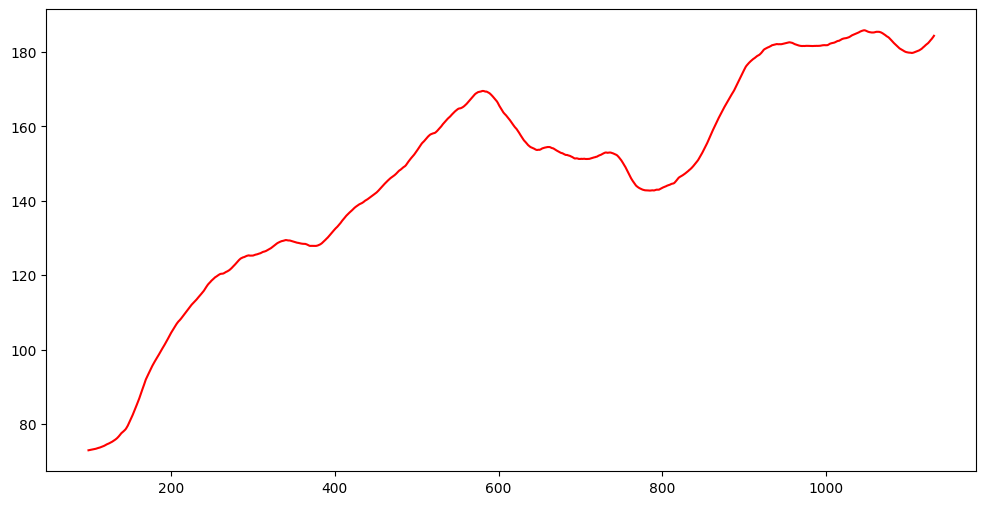

In [49]:
ma100 = df.Close.rolling(100).mean()
plt.figure(figsize = (12,6))
plt.plot(ma100,'r')

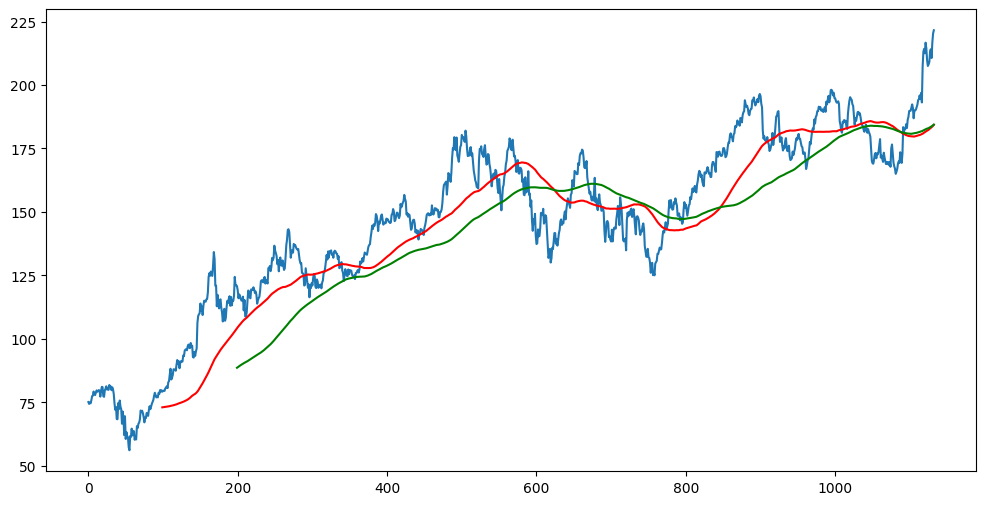

In [50]:
ma200 = df.Close.rolling(200).mean()
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [51]:
# Splitting data into training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_training.shape

(793, 1)

In [52]:
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
data_testing.shape

(340, 1)

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
data_training_array = scaler.fit_transform(data_training)
x_train = []
y_train = []
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [54]:
x_train.shape

(693, 100, 1)

In [55]:
y_train.shape

(693,)

In [56]:
# ML Model
from tensorflow.keras.layers import Input,Dense,Dropout,LSTM
from keras.models import Sequential
model = Sequential()
model.add(Input(shape = (x_train.shape[1],1)))
model.add(LSTM(units = 50,activation = 'relu',return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 60,activation = 'relu',return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80,activation = 'relu',return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1))
model.summary()
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 50)
model.save('keras_model.keras')

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 44s 259ms/step - loss: 0.2797
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 255ms/step - loss: 0.0296
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 309ms/step - loss: 0.0225
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 236ms/step - loss: 0.0200
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 230ms/step - loss: 0.0158
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 307ms/step - loss: 0.0146
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 265ms/step - loss: 0.0135
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 232ms/step - loss: 0.0147
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 231ms/step - loss: 0.0131
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 296ms/step - loss: 0.0126
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 230ms/step - loss: 0.0141
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 308ms/step - loss: 0.0116
Epoch 13/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 244ms/step - loss: 0.0119
Epoch 14/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 287ms/step - loss: 0.0134
Epoch 15/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 309ms/ste

In [57]:
# Train the model
history = model.fit(x_train, y_train, epochs=50)
# Access training history
training_loss = history.history['loss']

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 229ms/step - loss: 0.0071
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 234ms/step - loss: 0.0069
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 231ms/step - loss: 0.0066
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 229ms/step - loss: 0.0073
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 304ms/step - loss: 0.0072
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 229ms/step - loss: 0.0070
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 304ms/step - loss: 0.0064
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 228ms/step - loss: 0.0065
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 306ms/step - loss: 0.0068
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 227ms/step - loss: 0.0071
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 303ms/step - loss: 0.0057
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 243ms/step - loss: 0.0060
Epoch 13/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 235ms/step - loss: 0.0059
Epoch 14/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 227ms/step - loss: 0.0052
Epoch 15/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 305ms/step 

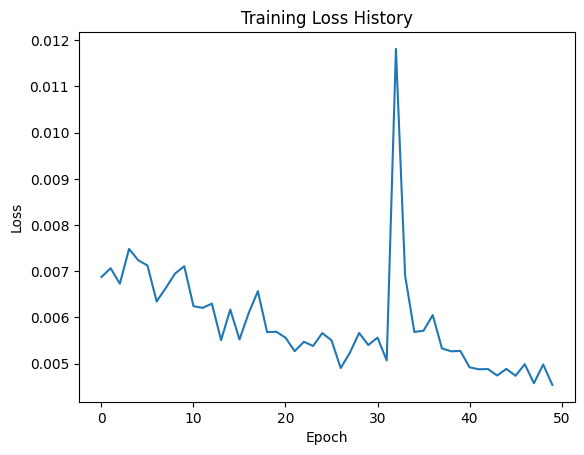

In [58]:
import matplotlib.pyplot as plt
# Plotting the training loss
plt.plot(training_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss History')
plt.show()

In [59]:
data_testing.head()

,Close
793,147.919998
794,147.410004
795,145.309998
796,145.910004
797,151.029999


In [60]:
past_100_days = data_training.tail(100)
final_df = past_100_days._append(data_testing,ignore_index = True)

In [61]:
final_df.head()

,Close
0,142.449997
1,146.100006
2,146.399994
3,145.429993
4,140.089996


In [62]:
input_data = scaler.fit_transform(final_df)
input_data

array([[1.80565618e-01],
       [2.18377790e-01],
       [2.21485505e-01],
       [2.11436804e-01],
       [1.56117256e-01],
       [1.59535901e-01],
       [1.44618234e-01],
       [1.37988178e-01],
       [1.86159822e-01],
       [1.38402645e-01],
       [1.80151309e-01],
       [1.94032965e-01],
       [1.95172513e-01],
       [1.90303548e-01],
       [2.30498354e-01],
       [2.53081930e-01],
       [2.83020801e-01],
       [2.52046077e-01],
       [2.04910443e-01],
       [3.18243104e-01],
       [2.93380274e-01],
       [2.65513266e-01],
       [2.07293078e-01],
       [1.43582382e-01],
       [1.38402645e-01],
       [1.43996691e-01],
       [1.50005205e-01],
       [1.02040794e-01],
       [2.26354470e-01],
       [2.55671798e-01],
       [2.40961365e-01],
       [2.59193981e-01],
       [2.46244640e-01],
       [2.66238505e-01],
       [2.72143322e-01],
       [2.38164263e-01],
       [2.60644301e-01],
       [2.69864384e-01],
       [2.39200274e-01],
       [1.98901930e-01],


In [63]:
input_data.shape

(440, 1)

In [64]:
x_test = []
y_test = []
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
x_test,y_test = np.array(x_test),np.array(y_test)
x_test.shape

(340, 100, 1)

In [65]:
y_test.shape

(340,)

In [66]:
# Making Predictions
y_predicted = model.predict(x_test)
y_predicted.shape

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step


(340, 1)

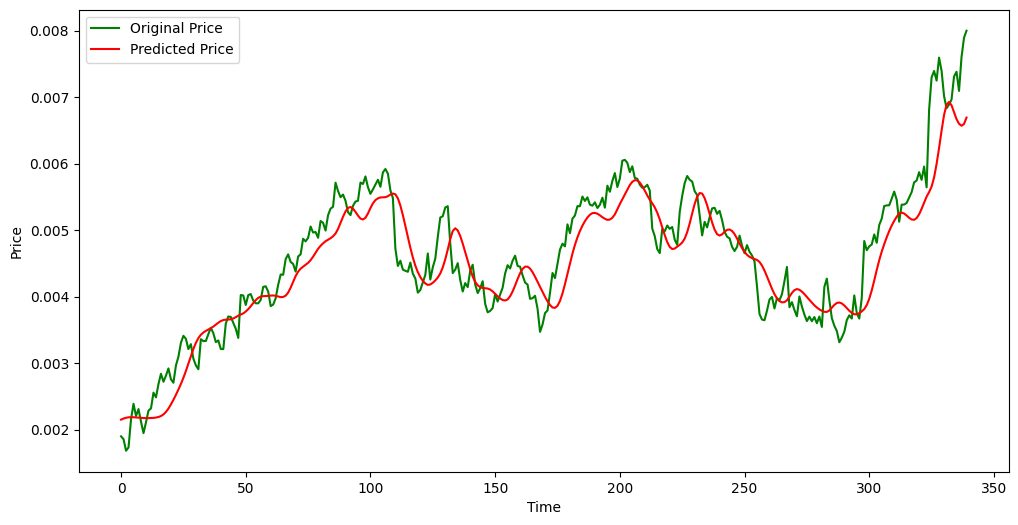

In [67]:
scaler.scale_
scale_factor = 1 / scaler.data_min_
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor
plt.figure(figsize = (12,6))
plt.plot(y_test,'g',label = 'Original Price')
plt.plot(y_predicted,'r',label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [69]:
from tensorflow import keras
model = keras.models.load_model('keras_model.keras')
model.save('keras_model.keras')

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [75]:
save_path = '/content/drive/My Drive/Sam/keras_model.keras'

from tensorflow import keras
model.save(save_path)